In [4]:
from project.models import Project
import shapely
import geopandas
import contextily as cx
from public_data.models.gpu import ZoneUrba
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from django.conf import settings
import io

project_id = 1504

diagnostic = Project.objects.get(id=int(project_id))

geom = diagnostic.combined_emprise.transform("3857", clone=True)
srid, wkt = geom.ewkt.split(";")
polygons = shapely.wkt.loads(wkt)
gdf_emprise = geopandas.GeoDataFrame({"geometry": [polygons]}, crs="EPSG:3857")

data = {"color": [], "geometry": []}
# add zone_urba to map
queryset = ZoneUrba.objects.intersect(diagnostic.combined_emprise)
for zone_urba in queryset:
    srid, wkt = zone_urba.intersection.ewkt.split(";")
    polygons = shapely.wkt.loads(wkt)
    data["geometry"].append(polygons)
    data["color"].append((*[_/255 for _ in zone_urba.get_color()], 0.9))

data

{'color': [(0.33725490196078434, 0.6666666666666666, 0.00784313725490196, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (0.33725490196078434, 0.6666666666666666, 0.00784313725490196, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (0.33725490196078434, 0.6666666666666666, 0.00784313725490196, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (0.33725490196078434, 0.6666666666666666, 0.00784313725490196, 0.9),
  (0.9019607843137255, 0.0, 0.0, 0.9),
  (0.9019607843137255, 0.0, 0.0, 0.9),
  (0.9019607843137255, 0.0, 0.0, 0.9),
  (1.0, 0.396078431372549, 0.396078431372549, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (0.33725490196078434, 0.6666666666666666, 0.00784313725490196, 0.9),
  (0.33725490196078434, 0.6666666666666666, 0.00784313725490196, 0.9),
  (0.33725490196078434, 0.6666666666666666, 0.00784313725490196, 0.9),
  (1.0, 1.0, 0.0, 0.9),
  (0.33725490

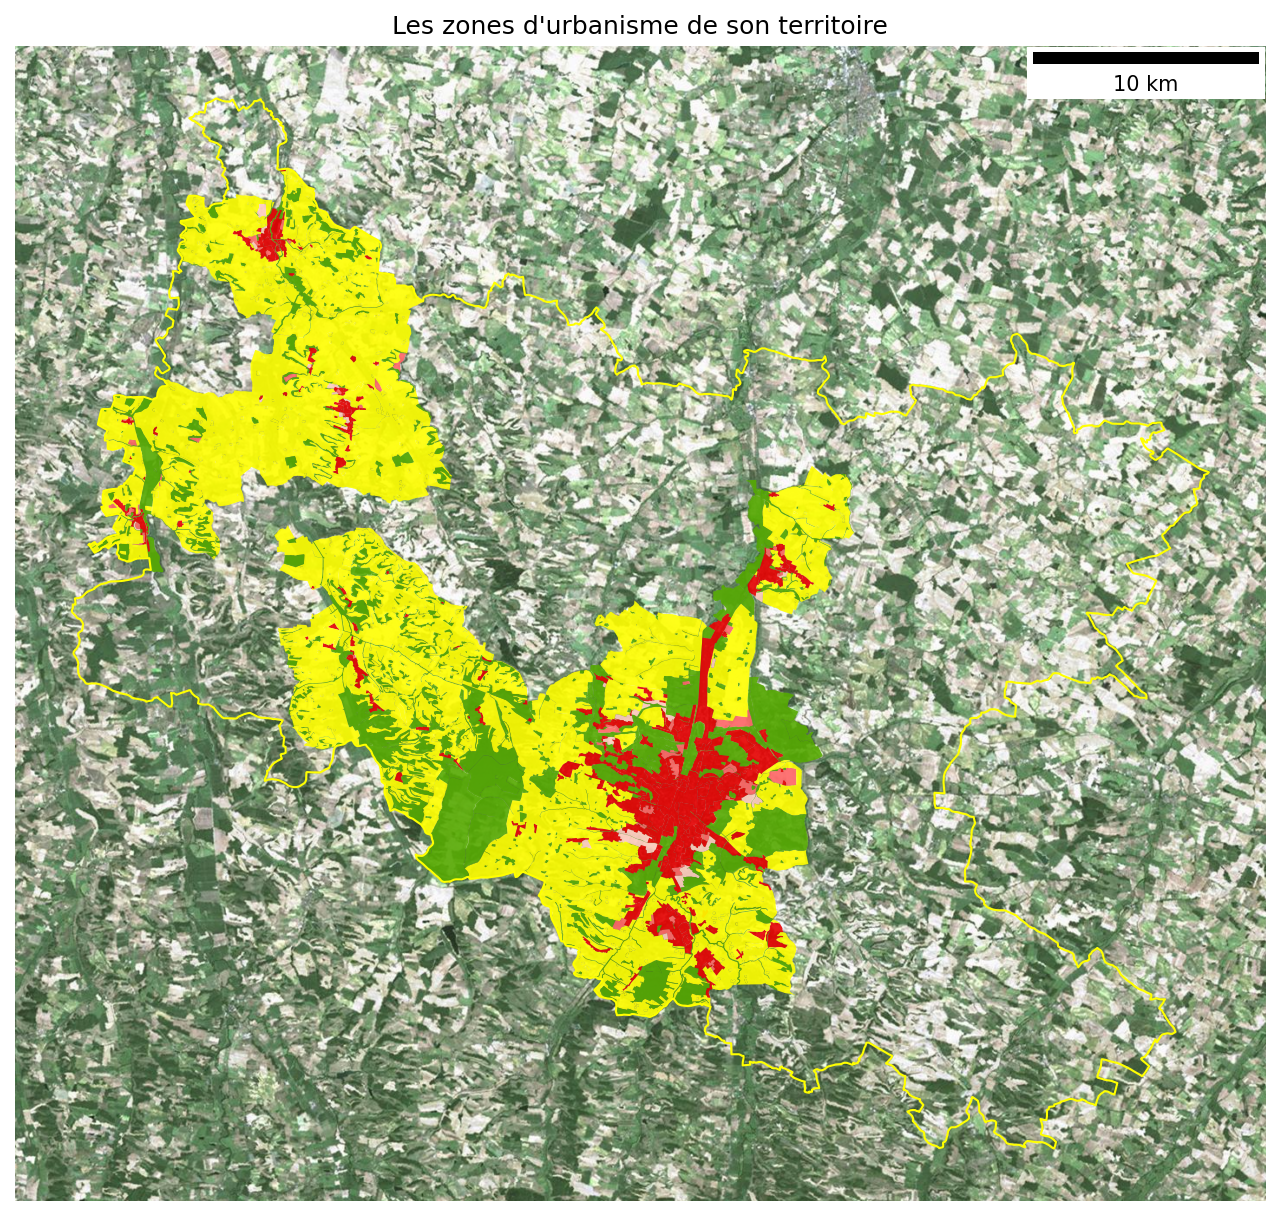

In [5]:
zone_urba_gdf = geopandas.GeoDataFrame(data, crs="EPSG:4326").to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 10))
plt.axis("off")
fig.set_dpi(150)

zone_urba_gdf.plot(ax=ax, color=zone_urba_gdf["color"])
gdf_emprise.plot(ax=ax, facecolor="none", edgecolor="yellow")
ax.add_artist(ScaleBar(1))
ax.set_title("Les zones d'urbanisme de son territoire")
cx.add_basemap(ax, source=settings.ORTHOPHOTO_URL)

geom = diagnostic.combined_emprise.transform("3857", clone=True)
srid, wkt = geom.ewkt.split(";")
polygons = shapely.wkt.loads(wkt)
gdf_emprise = geopandas.GeoDataFrame({"geometry": [polygons]}, crs="EPSG:3857")

In [3]:
img_data = io.BytesIO()
plt.savefig(img_data, bbox_inches="tight")
plt.close()
img_data.seek(0)

0

In [13]:
from project.tasks import generate_theme_map_gpu

generate_theme_map_gpu(1504)

In [7]:
Project.objects.get(id=int(project_id)).theme_map_gpu

<ImageFieldFile: diagnostics/diag_001504/theme_map_gpu_1504.png>

In [12]:
diagnostic.theme_map_gpu = None
diagnostic.save()

ValueError: The 'theme_map_gpu' attribute has no file associated with it.

In [14]:
from project.models import HistoricalProject

ImportError: cannot import name 'HistoricalProject' from 'project.models' (/app/project/models/__init__.py)